<a id="1"></a>
# Including Libraries

Install some libraries if necessary and import everything that is needed

In [187]:
# !pip install librosa
# Data can be aquired here https://github.com/mjspk/Assignment2/Emotions

In [188]:
# Display graphs in line
%matplotlib inline

# Import Functions
import torch
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

import numpy as np 
np.random.seed(42)

import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import IPython
from tqdm import tqdm # install ipywidgets to address warning

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler
import os
import random

# Suppress read write warnings
import warnings
warnings.filterwarnings('ignore')

#Set the Device to do training on
device = "cuda" if torch.cuda.is_available() else "cpu"

<a id="2"></a>
# Including the Datasets

A path needs to be provided to the main directory. Inside this directory should be a list of folders with Emotions. Each folder contains the audio files ot load

In [189]:
main_Path='Emotions/'

<a id="3"></a>
# Data Analyze

In [190]:
# Load a list of all the data files available

emotions=os.listdir(main_Path)
main=[]
for emotion in emotions:
    path=main_Path+emotion+'/'
    for file in os.listdir(path):
        main.append([emotion,file])
main_df=pd.DataFrame(main,columns=['Emotion','File'])
main_df.head()

Emotion                      File
0   Angry  03-01-05-01-01-01-01.wav
1   Angry  03-01-05-01-01-01-02.wav
2   Angry  03-01-05-01-01-01-03.wav
3   Angry  03-01-05-01-01-01-04.wav
4   Angry  03-01-05-01-01-01-05.wav

In [191]:
# Look at the unique emotions
main_df['Emotion'].unique()

array(['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad',
       'Suprised'], dtype=object)

In [192]:
# Convert the dataframe to a csv so it doesn't need to be recreated every time
main_df.to_csv('main_df.csv',index=False)

In [193]:
# Setup variable for further displays
emotion_names=main_df['Emotion'].unique()
colors={'Disgusted':'#804E2D','Happy':'#F19C0E','Sad':'#478FB8','Neutral':'#4CB847','Fearful':'#7D55AA','Angry':'#C00808','Suprised':'#EE00FF'}

#### Evaluate Distribution

Plot a histogram of the labels. The data is relatively balanced but the surprised class is lacking. We will fix that later during augmentation after loading the audio from the files

[Text(0, 0, 'Angry'),
 Text(1, 0, 'Disgusted'),
 Text(2, 0, 'Fearful'),
 Text(3, 0, 'Happy'),
 Text(4, 0, 'Neutral'),
 Text(5, 0, 'Sad'),
 Text(6, 0, 'Suprised')]

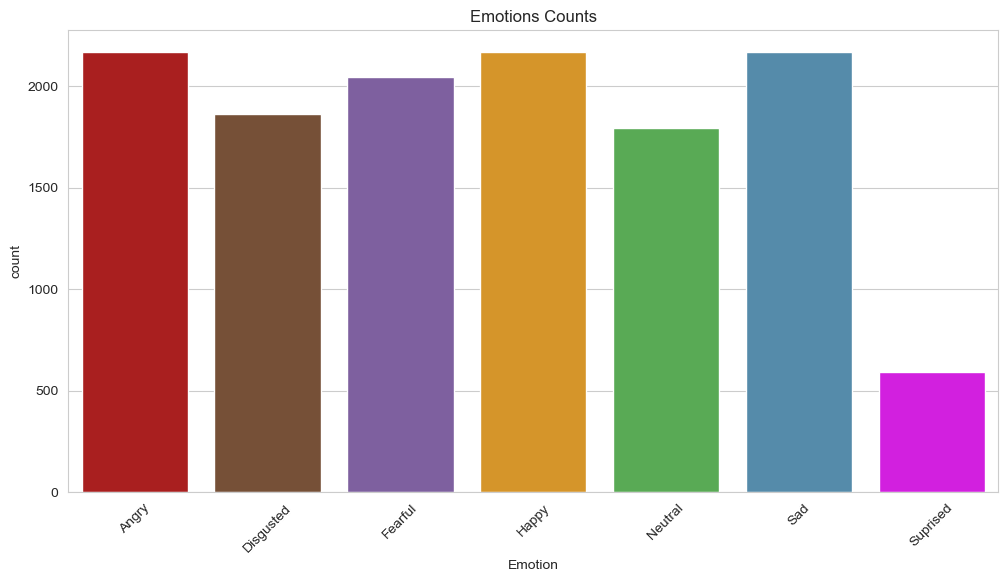

In [194]:
# Evaluate the distribution of the data
plt.figure(figsize=(12,6))
plt.title('Emotions Counts')
emotions=sns.countplot(x='Emotion',data=main_df,palette=colors)
emotions.set_xticklabels(emotions.get_xticklabels(),rotation=45)

In [195]:
#Make helper functions to display audio files
def wave_plot(data,sr,emotion,color):
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for waveplot',size=17)
    librosa.display.waveshow(y=data,sr=sr,color=color)

def spectogram(data,sr,emotion):
    audio=librosa.stft(data)
    audio_db=librosa.amplitude_to_db(abs(audio))
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for spectogram',size=17)
    librosa.display.specshow(audio_db,sr=sr,x_axis='time',y_axis='hz')

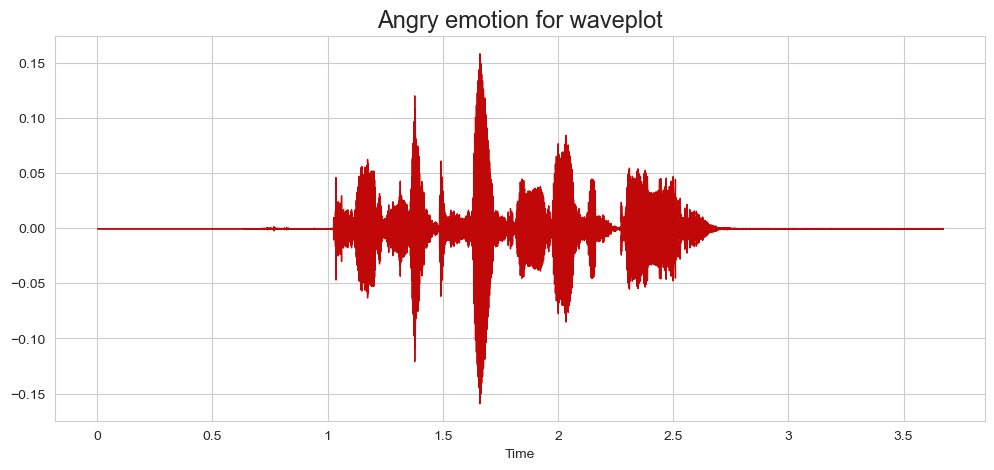

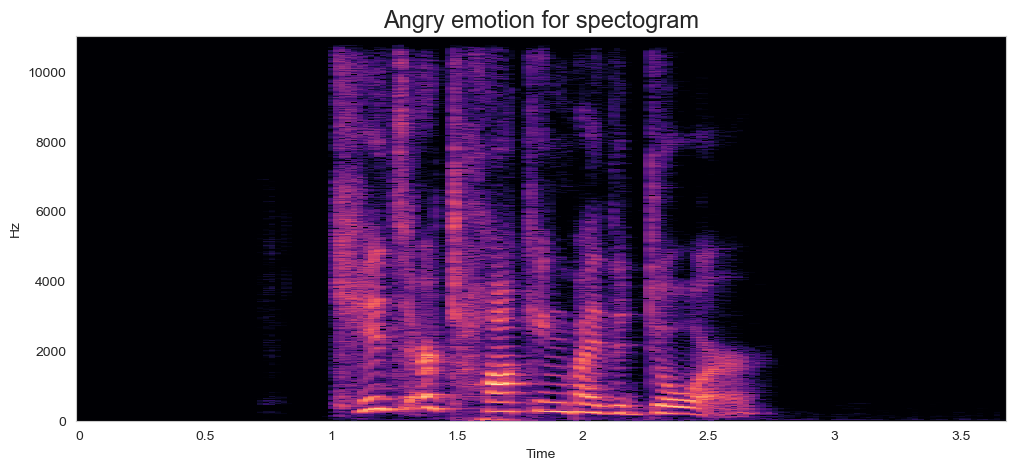

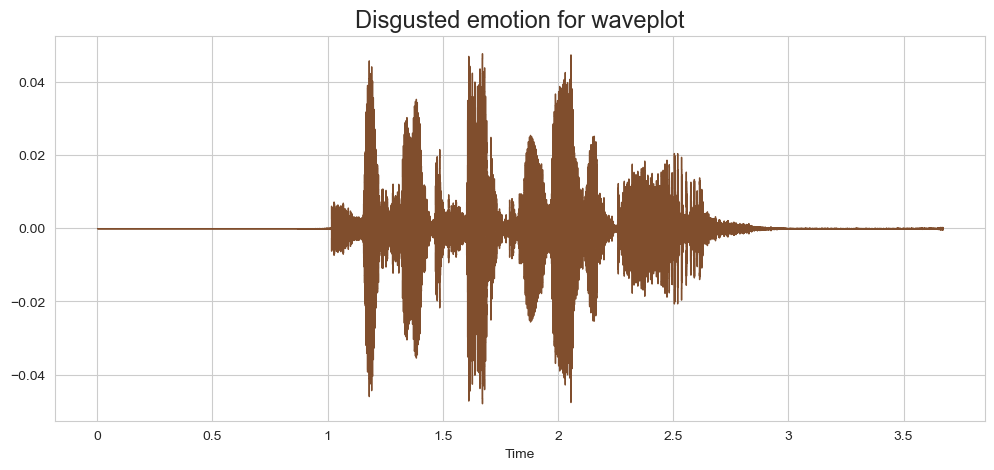

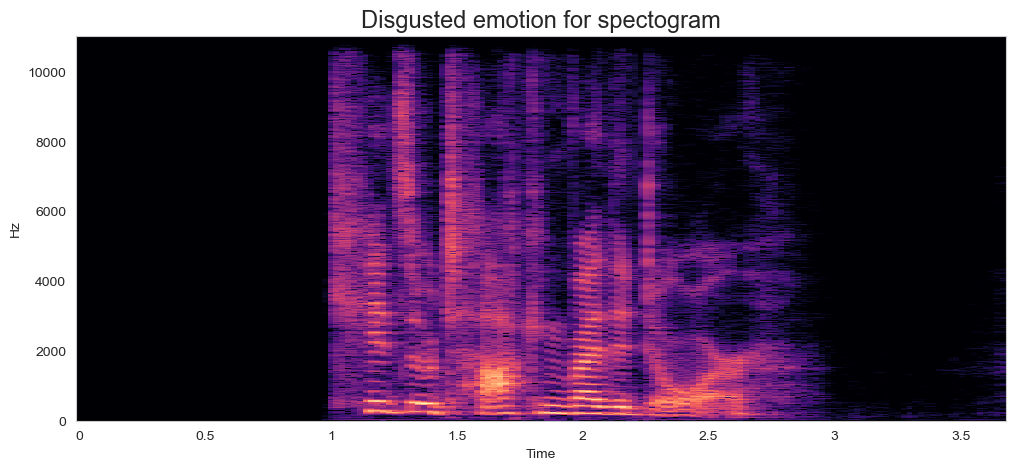

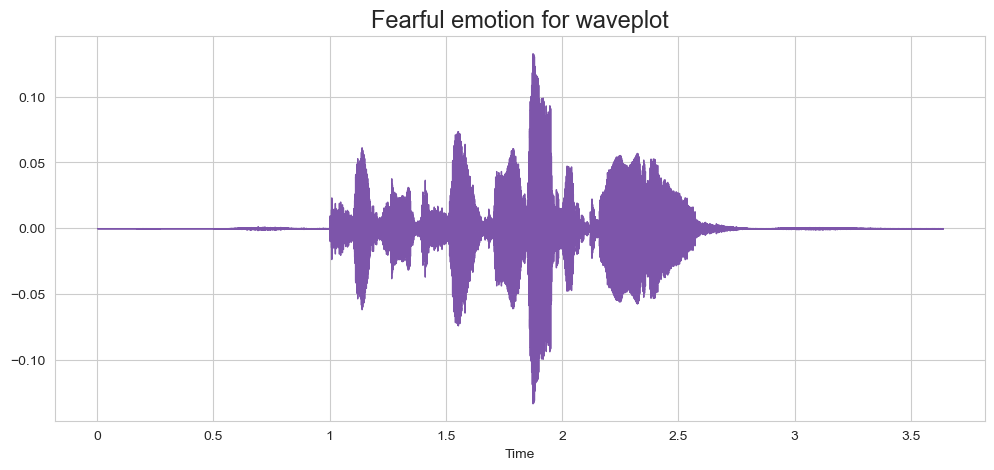

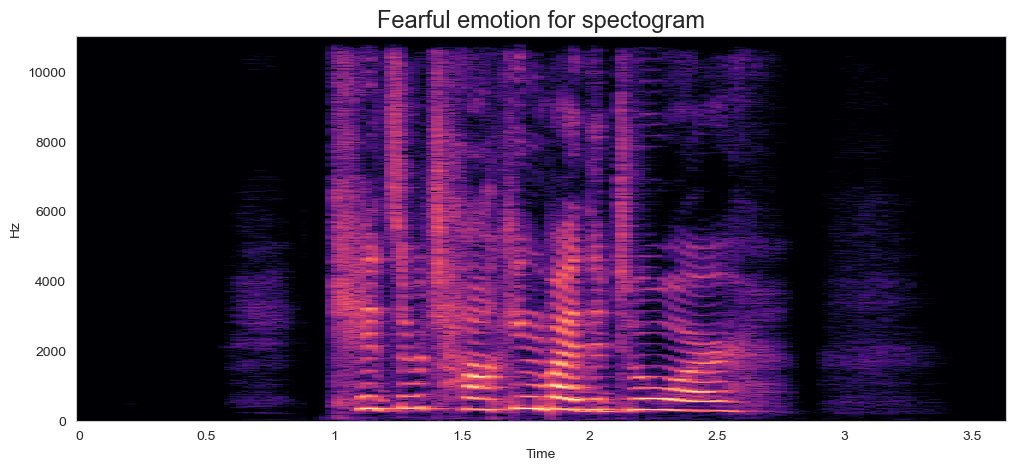

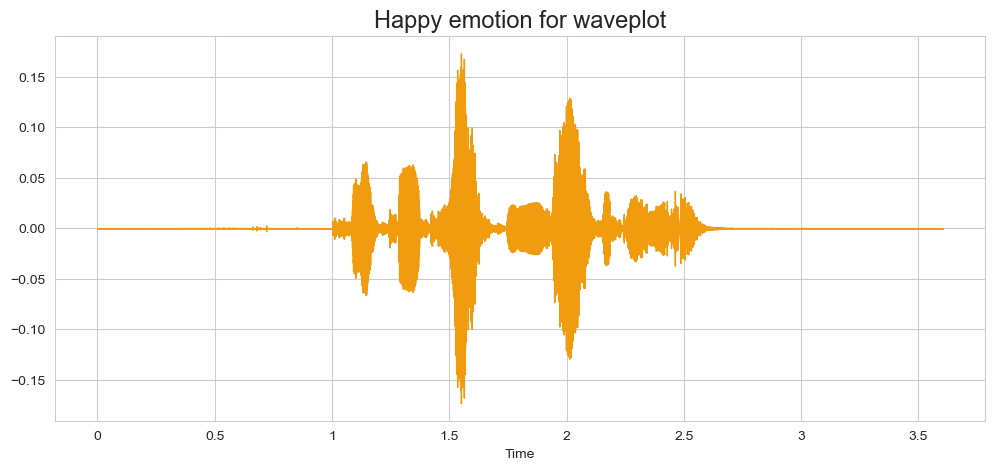

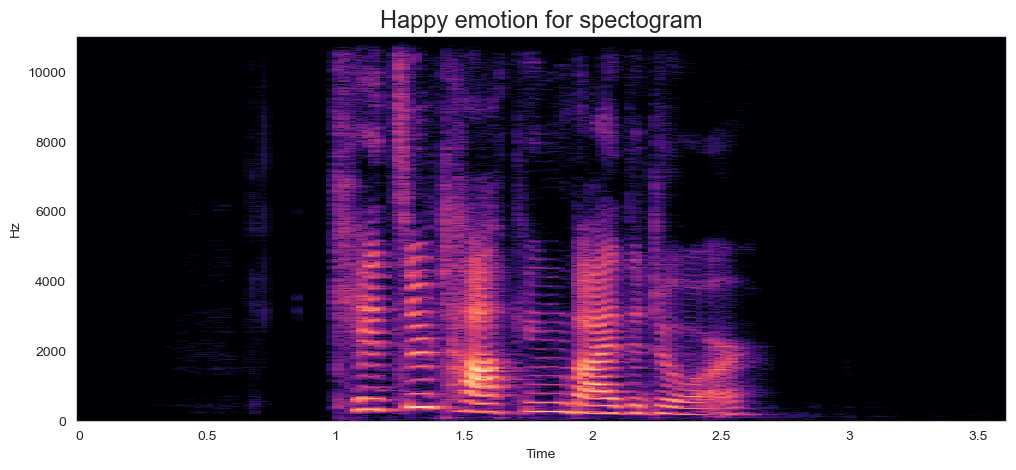

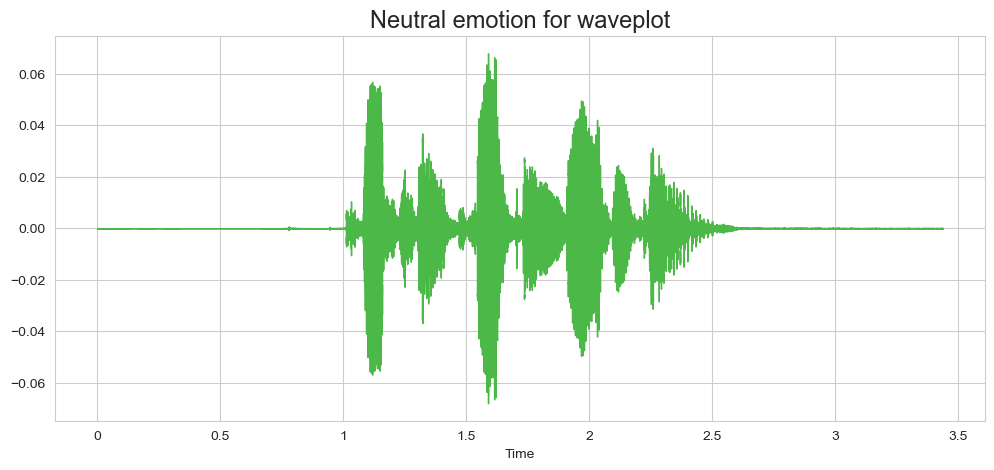

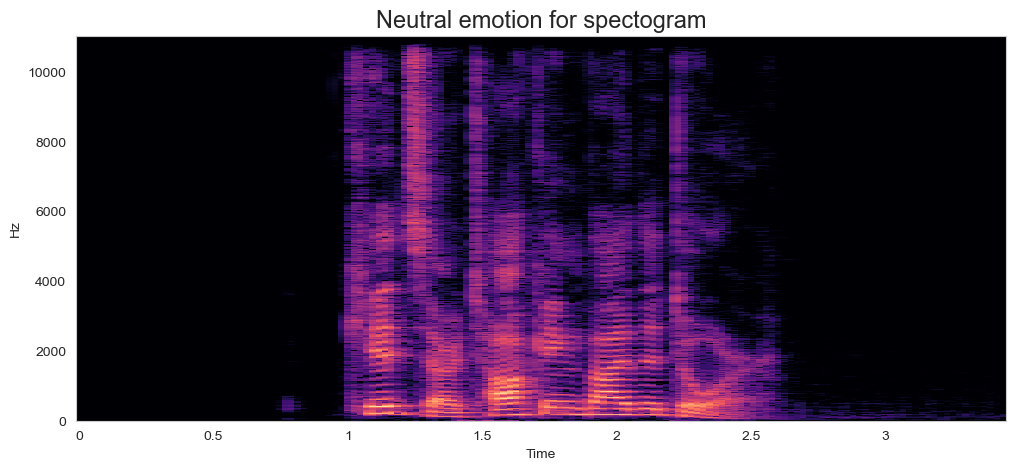

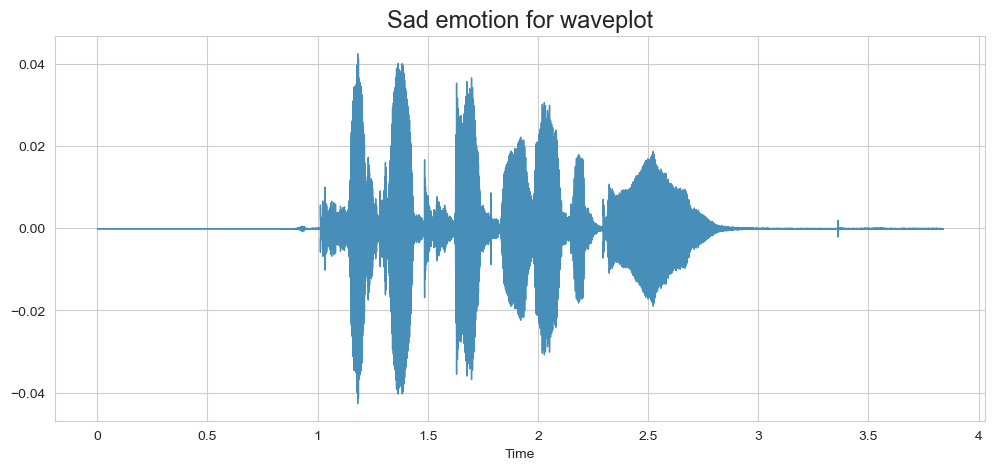

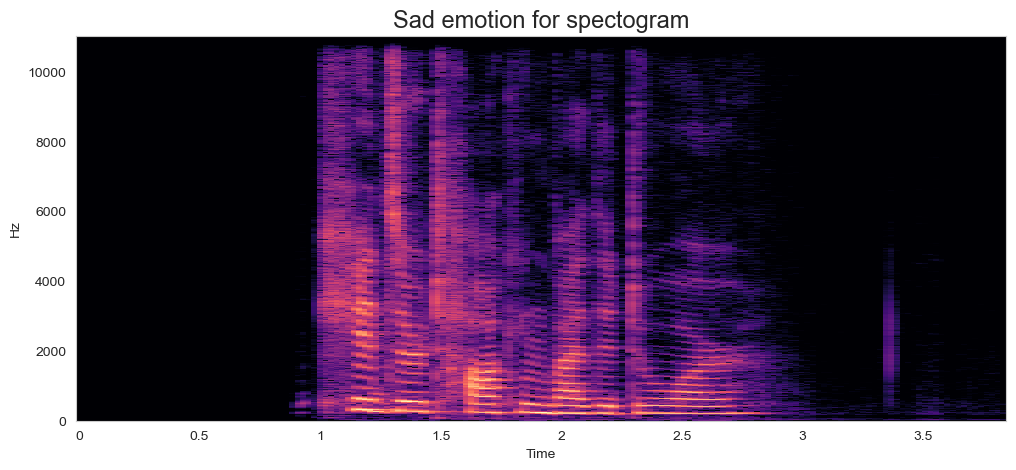

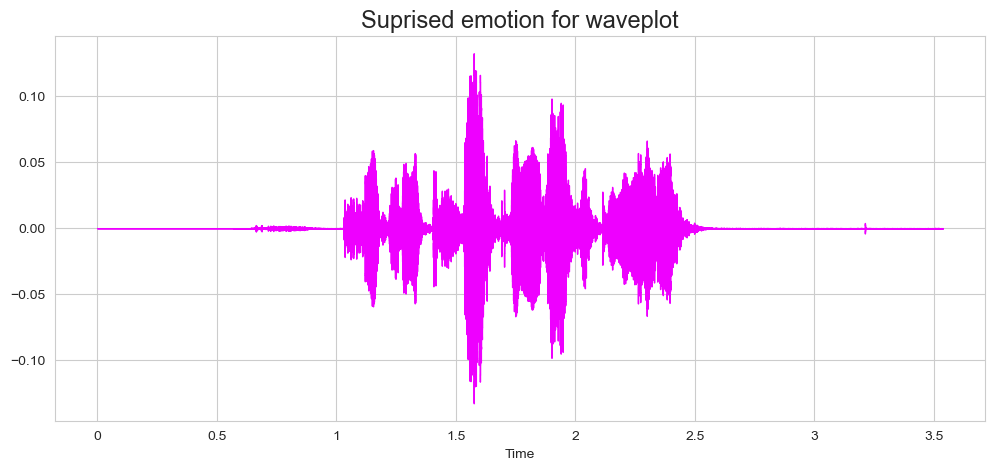

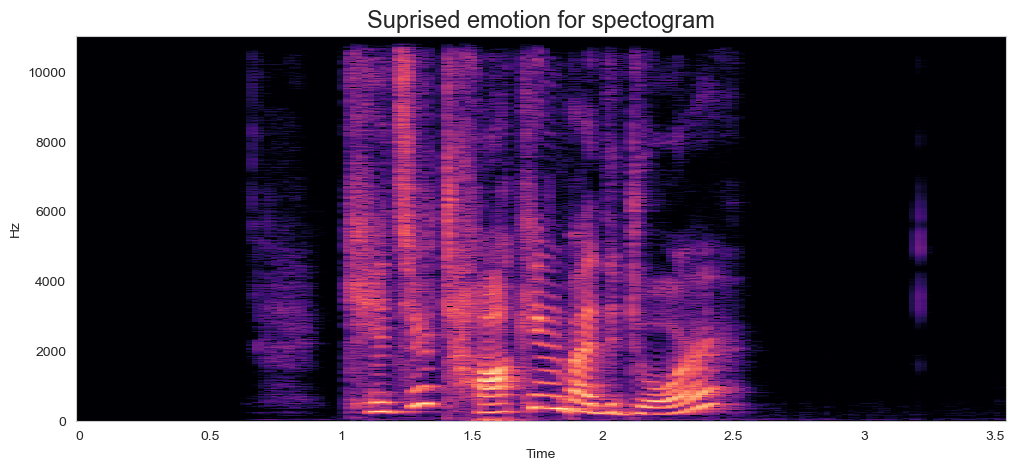

In [196]:
# Take a path from each emotion and display the wave form and spectogram
audio_path={}
for emotion in emotion_names:
    path=main_Path+emotion+ "/" + np.array(main_df['File'][main_df['Emotion']==emotion])[1]
    data,sr=librosa.load(path)
    wave_plot(data,sr,emotion,colors[emotion])
    spectogram(data,sr,emotion)
    audio_path[emotion] = path

Setup cells to listen to the samples of audio files

In [197]:
emotion_type = 'Happy'

print(audio_path[emotion_type])
print(emotion_type, 'Audio Sample: ', audio_path[emotion_type])
IPython.display.Audio(audio_path[emotion_type])

Emotions/Happy/03-01-03-01-01-01-02.wav
Happy Audio Sample:  Emotions/Happy/03-01-03-01-01-01-02.wav


In [198]:
emotion_type = 'Sad'

print(audio_path[emotion_type])
print(emotion_type, 'Audio Sample: ', audio_path[emotion_type])
IPython.display.Audio(audio_path[emotion_type])

Emotions/Sad/03-01-04-01-01-01-02.wav
Sad Audio Sample:  Emotions/Sad/03-01-04-01-01-01-02.wav


In [199]:
emotion_type = 'Fearful'

print(audio_path[emotion_type])
print(emotion_type, 'Audio Sample: ', audio_path[emotion_type])
IPython.display.Audio(audio_path[emotion_type])

Emotions/Fearful/03-01-06-01-01-01-02.wav
Fearful Audio Sample:  Emotions/Fearful/03-01-06-01-01-01-02.wav


In [200]:
emotion_type = 'Neutral'

print(audio_path[emotion_type])
print(emotion_type, 'Audio Sample: ', audio_path[emotion_type])
IPython.display.Audio(audio_path[emotion_type])

Emotions/Neutral/03-01-01-01-01-01-03.wav
Neutral Audio Sample:  Emotions/Neutral/03-01-01-01-01-01-03.wav


In [201]:
emotion_type = 'Suprised' #must use 'Suprised' due to typo

print(audio_path[emotion_type])
print(emotion_type, 'Audio Sample: ', audio_path[emotion_type])
IPython.display.Audio(audio_path[emotion_type])

Emotions/Suprised/03-01-08-01-01-01-02.wav
Suprised Audio Sample:  Emotions/Suprised/03-01-08-01-01-01-02.wav


In [202]:
emotion_type = 'Disgusted'

print(audio_path[emotion_type])
print(emotion_type, 'Audio Sample: ', audio_path[emotion_type])
IPython.display.Audio(audio_path[emotion_type])

Emotions/Disgusted/03-01-07-01-01-01-02.wav
Disgusted Audio Sample:  Emotions/Disgusted/03-01-07-01-01-01-02.wav


In [203]:
emotion_type = 'Angry' 

print(audio_path[emotion_type])
print(emotion_type, 'Audio Sample: ', audio_path[emotion_type])
IPython.display.Audio(audio_path[emotion_type])

Emotions/Angry/03-01-05-01-01-01-02.wav
Angry Audio Sample:  Emotions/Angry/03-01-05-01-01-01-02.wav


<a id="7"></a>
## Audio Augmentation and Feature Extraction

Start by creating a class that loads audio files and augments them. 

In [204]:
# Create a helper class to load audio files. 
# This can be used to load all the csv files in a dataframe and return the audio features and lables
class AudioLoader:

	# Set parameters to work with librosa's functions 
	def __init__(self, frame_length=2048, hop_length=512):
		self.frame_length=frame_length 
		self.hop_length=hop_length

	# Extract relevant features from the audio files and returns them
	def extract_features(self, data,sr,frame_length=2048,hop_length=512):
		result=np.array([])

		# Extract ZCR, RMS and MFCC, using librosa's functions
		zcr=np.squeeze(librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length))
		rmse=np.squeeze(librosa.feature.rms(y=data,frame_length=frame_length,hop_length=hop_length))
		mfcc=librosa.feature.mfcc(y=data,sr=sr)
		mfcc=np.ravel(mfcc.T)
		
		result=np.hstack((result,
						zcr,
						rmse,
						mfcc,
						))
		return result
	
	
	def load(self, df, base_file_path, label_column = "Emotion"):

		# Load the datafiles into audio Files
		X, Y = [], []

		# Load all the base data and split it into feature/columns
		print("Loading data...")
		for _, row  in tqdm(df.iterrows(), total=df.shape[0]):
			path = base_file_path + row[label_column] + "/" + row["File"]
			data,sr=librosa.load(path,duration=2.5, offset=0.6)
			aud=self.extract_features(data,sr)
			audio=np.array(aud)

			X.append(audio)
			Y.append(row[label_column])

		return X, Y

In [205]:
# Create a helper class to balance the data labels in the data set by augmenting the rows wihch are lacking
class DataBalancer:
    
	# Define Data Augmentation Functions for the class
	def add_noise(self, data,random=False,rate=0.035,threshold=0.075):
		if random:
			rate=np.random.random()*threshold
		noise=rate*np.random.uniform()*np.amax(data)
		augmented_data=data+noise*np.random.normal(size=data.shape[0])
		return augmented_data
	
	def shifting(self, data,rate=1000):
		augmented_data=int(np.random.uniform(low=-5,high=5)*rate)
		augmented_data=np.roll(data,augmented_data)
		return augmented_data

	def pitching(self, data,sr,pitch_factor=0.7,random=False):
		if random:
			pitch_factor=np.random.random() * pitch_factor
		return librosa.effects.pitch_shift(data,sr=sr,n_steps=pitch_factor)

	def streching(self, data,rate=0.8):
		return librosa.effects.time_stretch(data,rate=rate)
	

	
	def load_balanced(self, df, base_file_path, label_column = "Emotion", max_expansion = 1):

		# Load the base data
		loader = AudioLoader()
		X, Y = loader.load(df, base_file_path, label_column = label_column)

		
		# Figure out how big the dataset is and should be
		counts = df[label_column].value_counts()
		new_label_count = int(max_expansion * max(counts))

		# Loop over the labels and add enough columns for it to be balanced
		print("Balancing the data set")
		for emotion in tqdm(df[label_column].unique(), total = df[label_column].nunique()):

			# Figure out how many rows to add
			current_count = counts[emotion]
			needed_rows  = new_label_count - current_count

			# Compile the list of random files to augment to bring up the sample count to a balanced set
			rows_to_augment = df[df[label_column] == emotion].iloc[:1]
			while needed_rows > 0 :
				rows_to_augment = pd.concat([rows_to_augment, df[df[label_column] == emotion].sample(n = min(needed_rows, current_count))], axis = 0)
				needed_rows -= current_count
			
			# Loop over the rows, load the audio file, augment it and then use the loader to extract it features
			print("Augmenting the data set")
			for _, row in tqdm(rows_to_augment.iterrows(), total = rows_to_augment.shape[0]):

				path = base_file_path + row[label_column] + "/" + row["File"]
				data, sr = librosa.load(path,duration=2.5, offset=0.6)

				option = random.randint(1, 4)

				# Apply a random feature augmentation to data
				if option == 1:
					aug_audio=self.add_noise(data,random=True)
				elif option == 2:
					aug_audio=self.pitching(data,sr,random=True)	
				elif option == 3:
					aug_audio=self.streching(data)
				elif option == 4:
					aug_audio=self.shifting(data)

				aud=loader.extract_features(aug_audio,sr)
				audio=np.array(aud)

				X.append(audio)
				Y.append(row[label_column])

		return X, Y
	
db = DataBalancer()
X_augmented, Y_augmented = db.load_balanced(main_df, main_Path, max_expansion=2)

Loading data...


100%|██████████| 12798/12798 [01:46<00:00, 120.37it/s]


Balancing the data set


  0%|          | 0/7 [00:00<?, ?it/s]

Augmenting the data set


 14%|█▍        | 1/7 [00:33<03:22, 33.67s/it]

Augmenting the data set


 29%|██▊       | 2/7 [01:13<03:06, 37.32s/it]

Augmenting the data set


 43%|████▎     | 3/7 [01:47<02:22, 35.67s/it]

Augmenting the data set


 57%|█████▋    | 4/7 [02:19<01:42, 34.17s/it]

Augmenting the data set


 71%|███████▏  | 5/7 [02:56<01:10, 35.30s/it]

Augmenting the data set


 86%|████████▌ | 6/7 [03:30<00:34, 34.93s/it]

Augmenting the data set


100%|██████████| 7/7 [04:24<00:00, 37.77s/it]


In [206]:
# Save extracted audio to a csv since it take a while to generate
extract=pd.DataFrame(X_augmented)
extract['Emotion']=Y_augmented
extract.to_csv("processed_data.csv",index=False)

### Check that augmented dataset is in fact balanced

Looks like it is evenly balanced now thanks to data augmentation

[Text(0, 0, 'Angry'),
 Text(1, 0, 'Disgusted'),
 Text(2, 0, 'Fearful'),
 Text(3, 0, 'Happy'),
 Text(4, 0, 'Neutral'),
 Text(5, 0, 'Sad'),
 Text(6, 0, 'Suprised')]

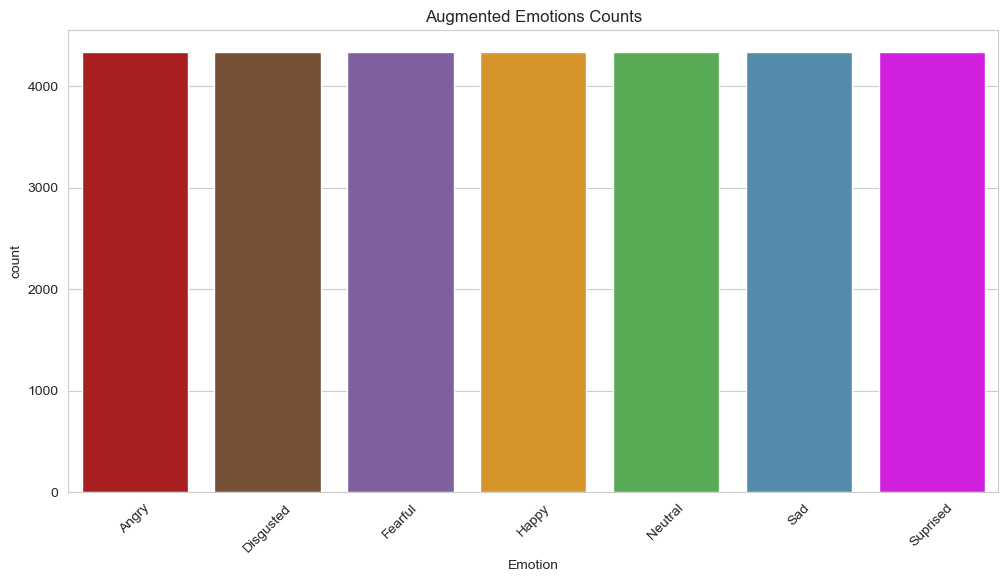

In [207]:
# Check that augmented dataset is in fact balanced
plt.figure(figsize=(12,6))
plt.title('Augmented Emotions Counts')
emotions=sns.countplot(x='Emotion',data=extract,palette=colors)
emotions.set_xticklabels(emotions.get_xticklabels(),rotation=45)


In [208]:
# check info() on augmented dataset
extract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30345 entries, 0 to 30344
Columns: 2971 entries, 0 to Emotion
dtypes: float64(2970), object(1)
memory usage: 687.8+ MB


In [209]:
#Load one of the files to show how the augmentations work
ex_emotion_type = "Happy"
ex_aug_file_path = audio_path[ex_emotion_type]
data,sr=librosa.load(ex_aug_file_path)

<a id="4"></a>
## Check data Augmentation Behaviour
### Original Audio

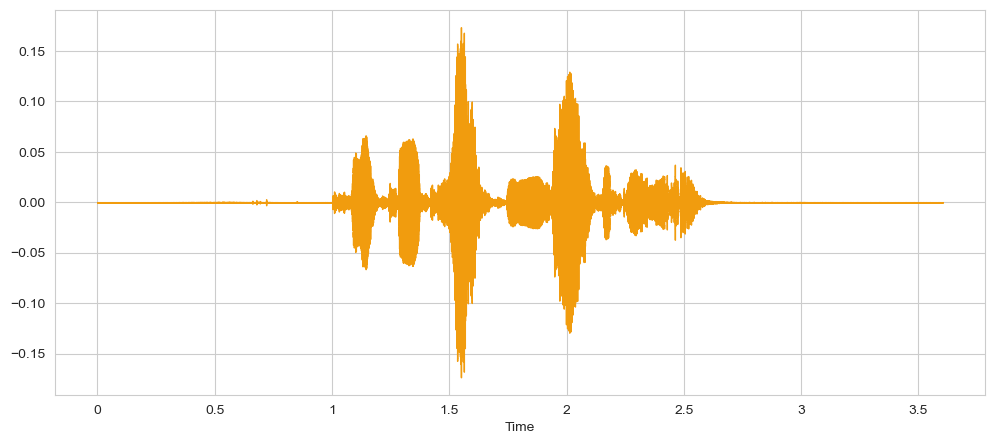

In [210]:
plt.figure(figsize=(12,5))
librosa.display.waveshow(data,sr=sr,color=colors[ex_emotion_type])
IPython.display.Audio(ex_aug_file_path)

<a id="8"></a>
### Noised Audio

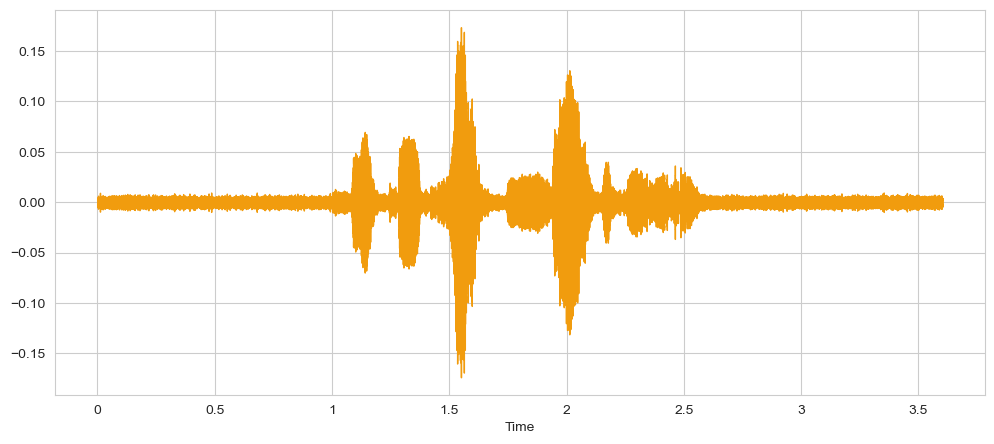

In [211]:
noised_audio=db.add_noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(noised_audio,sr=sr,color=colors[ex_emotion_type])
IPython.display.Audio(noised_audio,rate=sr)

<a id="10"></a>
### Streched Audio

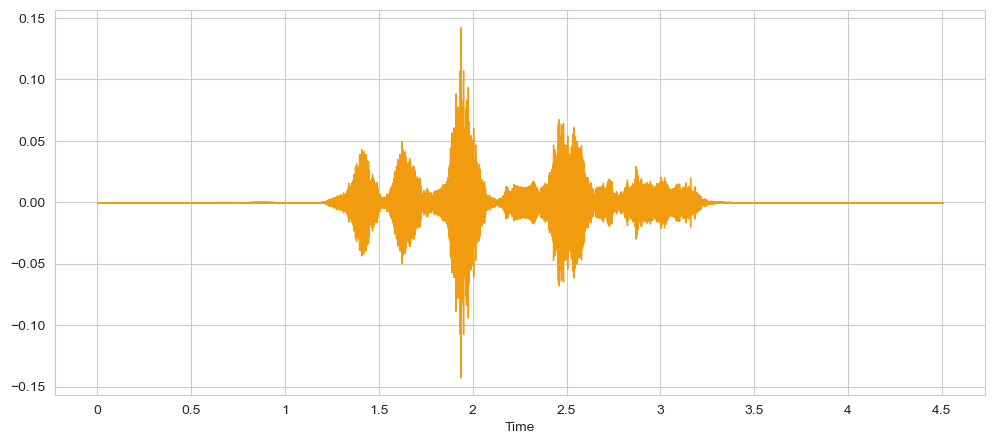

In [212]:
stretched_audio=db.streching(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(stretched_audio,sr=sr,color=colors[ex_emotion_type])
IPython.display.Audio(stretched_audio,rate=sr)

<a id="11"></a>
### Shifted Audio

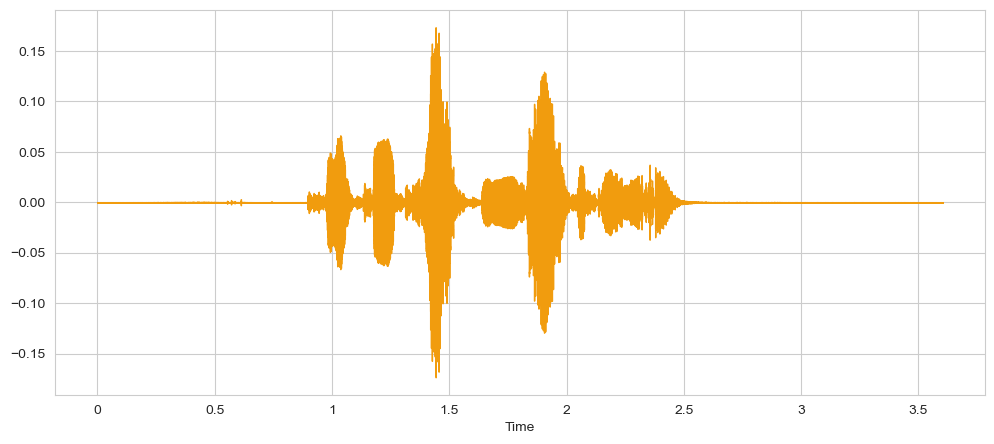

In [213]:
shifted_audio=db.shifting(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(shifted_audio,sr=sr,color=colors[ex_emotion_type])
IPython.display.Audio(shifted_audio,rate=sr)

<a id="12"></a>
### Pitched Audio

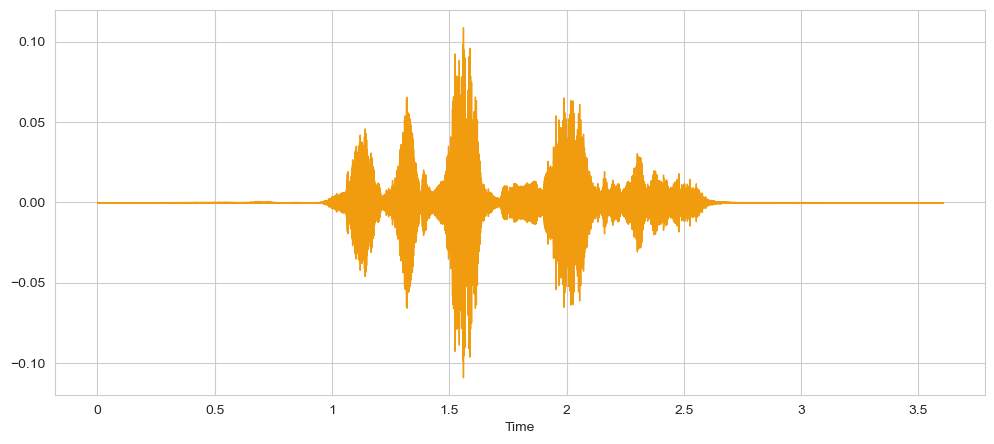

In [214]:
pitched_audio=db.pitching(data,sr)
plt.figure(figsize=(12,5))
librosa.display.waveshow(pitched_audio,sr=sr,color=colors[ex_emotion_type])
IPython.display.Audio(pitched_audio,rate=sr)

<a id="14"></a>
# Processing

<a id="15"></a>
### Including Analyzed Audio Features

In [215]:
# Read back in the proccessed data
df=pd.read_csv("processed_data.csv")
df.shape
df=df.sample(frac=1).reset_index(drop=True)
print(df.shape)


(30345, 2971)


In [216]:
df=df.fillna(0)
print(df.isna().any())
df.shape

0          False
1          False
2          False
3          False
4          False
           ...  
2966       False
2967       False
2968       False
2969       False
Emotion    False
Length: 2971, dtype: bool


(30345, 2971)

<a id="16"></a>
# Processing Analyzed Data for Training

In [217]:
# Split dataframe into data and labels
X=df.drop(labels='Emotion',axis=1)
Y=df['Emotion']

# Convert emotion label to an index
indexes = {'Disgusted':0,'Happy':1,'Sad':2,'Neutral':3,'Fearful':4,'Angry':5,'Suprised':6}
Y = Y.map(indexes)

# Convert the labels into a catagorical columns
lb=LabelEncoder()
Y = torch.tensor(Y)
Y = lb.fit_transform(Y)
Y = torch.nn.functional.one_hot(torch.tensor(Y)).float()
Y.shape

torch.Size([30345, 7])

<a id="17"></a>
## Train, Test and Validation Spliting

In [218]:
# Split off a test set for the final validation (balanced dataset, so no need to 'stratify')
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2,shuffle=True, stratify=None)

# Split the training set further into a training and validation set
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,random_state=42,test_size=0.1,shuffle=True, stratify=None)

print(f"Train: X:{X_train.shape}, y: {y_train.shape}")
print(f"Validation: X:{X_val.shape}, y: {y_val.shape}")
print(f"Test: X:{X_test.shape}, y: {y_test.shape}")

Train: X:(21848, 2970), y: torch.Size([21848, 7])
Validation: X:(2428, 2970), y: torch.Size([2428, 7])
Test: X:(6069, 2970), y: torch.Size([6069, 7])


## Normalize the data using Standard Scaler

In [219]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_val=scaler.transform(X_val)
X_train.shape,X_test.shape,X_val.shape,y_train.shape,y_test.shape,y_val.shape

((21848, 2970),
 (6069, 2970),
 (2428, 2970),
 torch.Size([21848, 7]),
 torch.Size([6069, 7]),
 torch.Size([2428, 7]))

In [220]:
X_train=np.expand_dims(X_train,axis=2)
X_val=np.expand_dims(X_val,axis=2)
X_test=np.expand_dims(X_test,axis=2)
X_train.shape, X_test.shape, X_val.shape

((21848, 2970, 1), (6069, 2970, 1), (2428, 2970, 1))

<a id="19"></a>
# Train the model

## Setup Pytorch Neural Network

In [221]:
# Define the Convolutional Neural Network to train the model with in a class
class AudioModel(nn.Module):
    def __init__(self):
        super(AudioModel, self).__init__()
        
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=512, kernel_size=5, stride=1, padding=2)
        self.bn1 = nn.BatchNorm1d(512)
        self.pool1 = nn.MaxPool1d(kernel_size=5, stride=2, padding=2)
        
        self.conv2 = nn.Conv1d(in_channels=512, out_channels=512, kernel_size=5, stride=1, padding=2)
        self.bn2 = nn.BatchNorm1d(512)
        self.pool2 = nn.MaxPool1d(kernel_size=5, stride=2, padding=2)
        
        self.conv3 = nn.Conv1d(in_channels=512, out_channels=256, kernel_size=5, stride=1, padding=2)
        self.bn3 = nn.BatchNorm1d(256)
        self.pool3 = nn.MaxPool1d(kernel_size=5, stride=2, padding=2)
        
        self.conv4 = nn.Conv1d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm1d(256)
        self.pool4 = nn.MaxPool1d(kernel_size=5, stride=2, padding=2)
        
        self.conv5 = nn.Conv1d(in_channels=256, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm1d(128)
        self.pool5 = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)
        
        self.fc1 = nn.Linear(in_features=128*93, out_features=512)
        self.bn6 = nn.BatchNorm1d(512)
        
        self.fc2 = nn.Linear(in_features=512, out_features=7)
        
    def forward(self, x):
        x = self.pool1(self.bn1(F.relu(self.conv1(x))))
        x = self.pool2(self.bn2(F.relu(self.conv2(x))))
        x = self.pool3(self.bn3(F.relu(self.conv3(x))))
        x = self.pool4(self.bn4(F.relu(self.conv4(x))))
        x = self.pool5(self.bn5(F.relu(self.conv5(x))))
        x = x.flatten(start_dim=1)
        x = self.bn6(nn.functional.relu(self.fc1(x)))
        x = self.fc2(x)
        x = nn.functional.softmax(x, dim=1)
        return x

audio_model = AudioModel()
audio_model

AudioModel(
  (conv1): Conv1d(1, 512, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool1d(kernel_size=5, stride=2, padding=2, dilation=1, ceil_mode=False)
  (conv2): Conv1d(512, 512, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool1d(kernel_size=5, stride=2, padding=2, dilation=1, ceil_mode=False)
  (conv3): Conv1d(512, 256, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool1d(kernel_size=5, stride=2, padding=2, dilation=1, ceil_mode=False)
  (conv4): Conv1d(256, 256, kernel_size=(3,), stride=(1,), padding=(1,))
  (bn4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool4): MaxPool1d(kernel_size=5, stride=2, padding=2, dilation=1, ceil_mode=F

<a id="18"></a>
## Tuning for Training

In [222]:
#Define an early stopper class to use during training

class EarlyStopper():
    def __init__(self, patience: int = 3):
        self.best_val = +np.inf
        self.current_val = +np.inf
        self.patience = patience
        self.steps_since_last_best = 0
        
    def __call__(self, val) -> bool:
        self.current_val = val
        self._update_best()
        if self.steps_since_last_best == self.patience:
            return True
        else:
            return False
        
    def _update_best(self):
        if self.current_val < self.best_val:
            tqdm.write(f"New best: {self.current_val:.4f}")
            self.best_val=self.current_val
            self.steps_since_last_best = 0
        else:
            self.steps_since_last_best+=1

# Pick an optimizer and use it to define a scheduler
optim = torch.optim.Adam(params=audio_model.parameters())

lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optim,
    "min",
    factor=0.1,
    patience=2,
    verbose=True
)

### Initialize a dataloader and create dataloaders for train, test, split

In [223]:
def get_data_loader(x,y,bs):
    # Permute np.array from NLC TO NCL
    x = torch.permute(torch.Tensor(x), dims=(0, 2, 1))
    y = torch.Tensor(y)
    return DataLoader(
        TensorDataset(x, y),
        batch_size=bs
    )

# Check the device and set datasize accordingly
if device == "cpu":
    # Small dataset for cpu running to setup data
    length = 100
    train_loader = get_data_loader(X_train[:length, :], y_train[:length, :], 8)
    val_loader = get_data_loader(X_val[:length, :], y_val[:length, :], 8)
    test_loader = get_data_loader(X_test[:length, :], y_test[:length, :], 8)
else:
    # Run full datasets on GPU for final training
    train_loader = get_data_loader(X_train, y_train, 8)
    val_loader = get_data_loader(X_val, y_val, 8)
    test_loader = get_data_loader(X_test, y_test, 8)

### Define functions for training and validating the model

In [224]:
#
# TODO: populate the history dict for plots below
# train_val_loss_acc_hist_avgs = {"epoch":[], "train_loss":[], "val_loss":[], "train_acc":[], "val_acc":[]}
#

# New code to define a model trainer
def train(model, optim, scheduler, criterion, train_loader) -> (float, float):
    device = next(iter(audio_model.parameters())).device # Check if this can be just model
    model.train()
    total_loss = 0
    total_acc = 0
    for x,y in train_loader:
        x = x.to(device)
        y = y.to(device)
        y_pred = model(x)
        loss = criterion(y_pred.squeeze(), y)
        loss.backward()
        optim.step()
        optim.zero_grad()
        total_loss += loss.item()

        total_acc += torch.sum(torch.argmax(y_pred) == torch.argmax(y)).item()
    avg_loss = total_loss / len(train_loader)
    avg_acc = total_acc / (len(train_loader.dataset))
    scheduler.step(avg_loss)
    return avg_acc, avg_loss
    

@torch.no_grad()
def validate(model, val_loader, criterion) -> (float, float):
    model.eval()
    device = next(iter(audio_model.parameters())).device
    total_loss = 0
    total_acc = 0
    for x,y in val_loader:
        x = x.to(device)
        y = y.to(device)
        y_pred = model(x)
        loss = criterion(y_pred.squeeze(), y)
        total_loss+=loss.item()
        total_acc += torch.sum(torch.argmax(y_pred) == torch.argmax(y)).item()
    avg_loss = total_loss / len(val_loader)
    avg_acc = total_acc / (len(val_loader.dataset))
    
    return  avg_acc, avg_loss


### Train the model

In [225]:
model_name = "./best_model.pt" # Path to save best model
epochs = 100 # Number of epochs to run
criterion = nn.CrossEntropyLoss() # Criteria to evaluate performance
early_stopper = EarlyStopper(patience=10)
audio_model.to(device)
train_val_loss_acc_hist_avgs = {"epoch":[], "train_loss":[], "val_loss":[], "train_acc":[], "val_acc":[]}
# Loop over the epochs, train the model, and check if the error is improving
for _ in tqdm(range(epochs)):
    train_acc, train_loss =train(audio_model, optim, lr_scheduler, criterion, train_loader)
    val_acc, val_loss = validate(audio_model, val_loader, criterion)
    train_val_loss_acc_hist_avgs["epoch"].append(_)
    train_val_loss_acc_hist_avgs["train_loss"].append(train_loss)
    train_val_loss_acc_hist_avgs["val_loss"].append(val_loss)
    train_val_loss_acc_hist_avgs["train_acc"].append(train_acc)
    train_val_loss_acc_hist_avgs["val_acc"].append(val_acc)
    if early_stopper(val_loss):
        break
    if early_stopper.steps_since_last_best == 0:
        torch.save(audio_model, model_name)

  1%|          | 1/100 [01:18<2:08:55, 78.14s/it]

New best: 1.7941


  2%|▏         | 2/100 [02:35<2:06:36, 77.52s/it]

New best: 1.7463


  4%|▍         | 4/100 [05:09<2:03:28, 77.17s/it]

New best: 1.7324


  6%|▌         | 6/100 [07:43<2:00:43, 77.06s/it]

Epoch 00007: reducing learning rate of group 0 to 1.0000e-04.


 10%|█         | 10/100 [12:51<1:55:39, 77.10s/it]

New best: 1.7261


 11%|█         | 11/100 [14:08<1:54:24, 77.13s/it]

New best: 1.7131


 12%|█▏        | 12/100 [15:23<1:52:17, 76.56s/it]

New best: 1.7119


 14%|█▍        | 14/100 [17:49<1:46:52, 74.57s/it]

New best: 1.7108


 15%|█▌        | 15/100 [19:01<1:44:48, 73.98s/it]

New best: 1.7071


 18%|█▊        | 18/100 [22:54<1:45:01, 76.84s/it]

New best: 1.7015


 20%|██        | 20/100 [25:32<1:44:07, 78.10s/it]

New best: 1.6964


 21%|██        | 21/100 [26:52<1:43:32, 78.64s/it]

New best: 1.6916


 24%|██▍       | 24/100 [29:42<1:17:41, 61.33s/it]

New best: 1.6908


 27%|██▋       | 27/100 [31:50<59:41, 49.05s/it]  

New best: 1.6838


 29%|██▉       | 29/100 [33:21<55:51, 47.21s/it]

New best: 1.6799


 31%|███       | 31/100 [34:48<52:06, 45.32s/it]

New best: 1.6798


 34%|███▍      | 34/100 [36:59<48:37, 44.21s/it]

New best: 1.6794


 39%|███▉      | 39/100 [40:37<44:22, 43.65s/it]

New best: 1.6784


 40%|████      | 40/100 [41:20<43:33, 43.57s/it]

New best: 1.6780


 42%|████▏     | 42/100 [42:47<42:04, 43.53s/it]

New best: 1.6738


 45%|████▌     | 45/100 [44:56<39:26, 43.03s/it]

New best: 1.6675


 46%|████▌     | 46/100 [45:39<38:39, 42.95s/it]

New best: 1.6628


 49%|████▉     | 49/100 [47:44<35:46, 42.10s/it]

New best: 1.6599


 50%|█████     | 50/100 [48:26<34:56, 41.93s/it]

New best: 1.6567


 52%|█████▏    | 52/100 [49:49<33:26, 41.80s/it]

New best: 1.6537


 53%|█████▎    | 53/100 [50:31<32:48, 41.89s/it]

New best: 1.6534


 54%|█████▍    | 54/100 [51:13<32:00, 41.75s/it]

New best: 1.6494


 60%|██████    | 60/100 [55:37<29:06, 43.65s/it]

New best: 1.6487


 69%|██████▉   | 69/100 [1:02:54<28:15, 54.70s/it]


# Reload Best Model and Evaluate Performance

In [233]:

net = torch.load(model_name)
net.eval() # Set the model to evaluation mode prior to testing

AudioModel(
  (conv1): Conv1d(1, 512, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool1d(kernel_size=5, stride=2, padding=2, dilation=1, ceil_mode=False)
  (conv2): Conv1d(512, 512, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool1d(kernel_size=5, stride=2, padding=2, dilation=1, ceil_mode=False)
  (conv3): Conv1d(512, 256, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool1d(kernel_size=5, stride=2, padding=2, dilation=1, ceil_mode=False)
  (conv4): Conv1d(256, 256, kernel_size=(3,), stride=(1,), padding=(1,))
  (bn4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool4): MaxPool1d(kernel_size=5, stride=2, padding=2, dilation=1, ceil_mode=F

In [235]:
# Calculate how many items it gets right
correct = 0
total = 0

cm_labels = np.array([])
cm_pred = np.array([])

with torch.no_grad():
    for audio, labels in test_loader:

        # Convert if run on a cuda device
        if device != "cpu":
            audio = audio.cuda()
            labels = labels.cuda()

        # Predict the outputs
        outputs = net(audio)
        _, labels = torch.max(labels.data, 1)
        _, predicted = torch.max(outputs.data, 1)

        # Count the number of outputs gottten correct
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Add the label and prediction to build a confusion matrix later
        cm_labels = np.concatenate([cm_labels, labels.cpu().numpy()], axis = 0)
        cm_pred = np.concatenate([cm_pred, predicted.cpu().numpy()], axis = 0)

print(f'Accuracy of the network on the test audio samples: {100 * correct / total:.2f}: %')

Accuracy of the network on the test audio samples: 51.01: %


<a id="20"></a>
# Analyze The Model Performance

<a id="21"></a>
## Accuracy History Charts

   epoch  train_loss  val_loss  train_acc   val_acc
0      0    1.831161  1.794090   0.006820  0.010708
1      1    1.780207  1.746337   0.009886  0.009473
2      2    1.775812  1.756137   0.010207  0.011120
3      3    1.758003  1.732351   0.011397  0.010708
4      4    1.761150  1.794641   0.010939  0.008237
    epoch  train_loss  val_loss  train_acc   val_acc
65     65    1.532947  1.661587   0.012999  0.012356
66     66    1.533536  1.671417   0.013045  0.012768
67     67    1.531020  1.685526   0.012999  0.011120
68     68    1.521101  1.667019   0.013731  0.012768
69     69    1.520868  1.666173   0.013731  0.011120


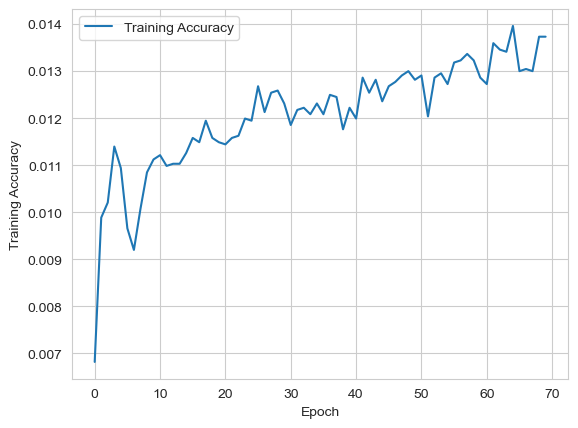

In [236]:
# create dataframe from the history
df = pd.DataFrame.from_dict(train_val_loss_acc_hist_avgs)
print(df.head())
print(df.tail())

# plot Training Accuracy Data
sns.set_style('whitegrid')
sns.lineplot(data=df, x='epoch', y='train_acc', label='Training Accuracy')

# labels
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.show()

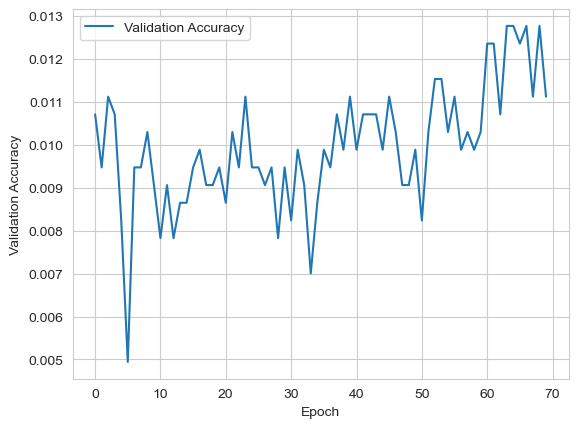

In [237]:
# plot the Validation Accuracy data
sns.set_style('whitegrid')
sns.lineplot(data=df, x='epoch', y='val_acc', label='Validation Accuracy')

# labels
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.show()

<a id="22"></a>
## Loss History Charts

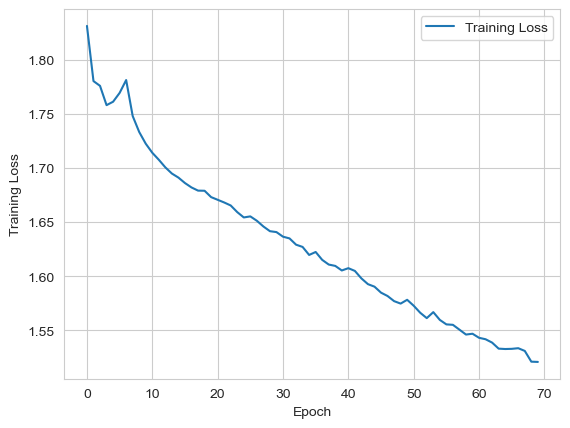

In [238]:
# create dataframe from the history
df = pd.DataFrame.from_dict(train_val_loss_acc_hist_avgs)

# plot the Training Loss data
sns.set_style('whitegrid')
sns.lineplot(data=df, x='epoch', y='train_loss', label='Training Loss')

# labels
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.show()

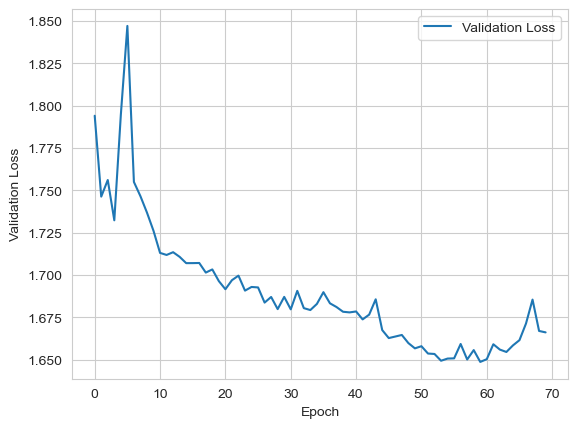

In [239]:
# plot the Validation Loss data
sns.set_style('whitegrid')
sns.lineplot(data=df, x='epoch', y='val_loss', label='Validation Loss')

# labels
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.show()

<a id="24"></a>
# Testing Model and Test Results

<a id="25"></a>
## Confusion Matrix

['Angry' 'Disgusted' 'Fearful' 'Happy' 'Neutral' 'Sad' 'Suprised']
[[441  45 112  54  37 130  26]
 [ 63 268  21  58  34 283 138]
 [153  62 482  97  36  37  37]
 [133 104 130 332  38 109  34]
 [ 99 112 173  66 200 185  55]
 [ 64  64  14  34  25 608  32]
 [ 21  11  12   9  14  12 765]]


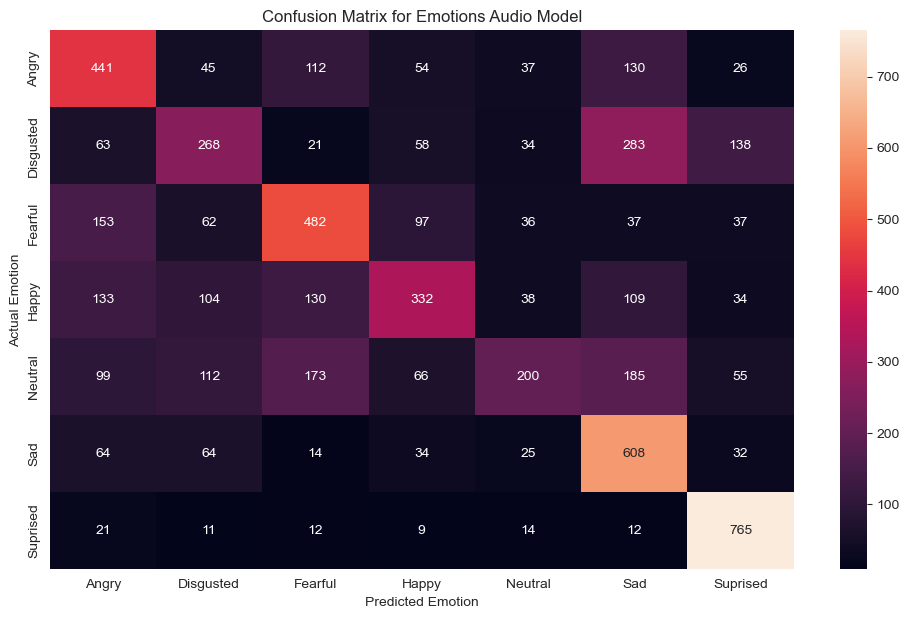

In [244]:
print(emotion_names)

conf=confusion_matrix(y_true=cm_labels,y_pred=cm_pred)
print(conf)

cm=pd.DataFrame(
    conf,index=[i for i in emotion_names],
    columns=[i for i in emotion_names]
)
plt.figure(figsize=(12,7))
ax=sns.heatmap(cm,annot=True,fmt='d')

ax.set_title(f'Confusion Matrix for Emotions Audio Model')
ax.set_xlabel("Predicted Emotion")
ax.set_ylabel("Actual Emotion")
plt.show()

In [246]:
cr = classification_report(y_true=cm_labels, y_pred=cm_pred, target_names=emotion_names)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

       Angry       0.45      0.52      0.48       845
   Disgusted       0.40      0.31      0.35       865
     Fearful       0.51      0.53      0.52       904
       Happy       0.51      0.38      0.43       880
     Neutral       0.52      0.22      0.31       890
         Sad       0.45      0.72      0.55       841
    Suprised       0.70      0.91      0.79       844

    accuracy                           0.51      6069
   macro avg       0.51      0.51      0.49      6069
weighted avg       0.51      0.51      0.49      6069



### Evaluate Misclassifications

In [256]:
# We don't train on raw audio files just features. So it is easier to just reload a batch and look for errors

batch_size = 8
samples = main_df.sample(batch_size)

# Apply same data manipulations
loader = AudioLoader()
X_post, Y_post = loader.load(samples, main_Path)
X_post = pd.DataFrame(X_post)
X_post = X_post.reindex(columns=range(X_train.shape[1]), fill_value=0)
X_post=X_post.fillna(0)
X_post = scaler.transform(X_post)
X_post=np.expand_dims(X_post,axis=2)
Y_post = pd.DataFrame(Y_post)[0].map(indexes)

Loading data...


100%|██████████| 8/8 [00:00<00:00, 61.82it/s]


In [258]:
#Make a prediction based on the data rows pulled with known audio
x = torch.permute(torch.Tensor(X_post), dims=(0, 2, 1))
labels= torch.Tensor(Y_post)
predictions = net(x.cuda())
_, predictions = torch.max(predictions.data, 1)
missclassifications = torch.nonzero(predictions != labels.cuda(), as_tuple=False)[:, 0].tolist()
missclassifications

[0, 3, 4, 5, 7]

#### Listen to some missclassications

In [259]:
i = missclassifications[0]
print(f"Actual Label: {emotion_names[int(labels[i].item())]}, Model Prediction {emotion_names[int(predictions[i].item())]}")
data,sr=librosa.load(main_Path+samples.iloc[i].Emotion + "/" + samples.iloc[i].File)
IPython.display.Audio(data, rate=sr)

Actual Label: Angry, Model Prediction Sad


In [260]:
i = missclassifications[1]
print(f"Actual Label: {emotion_names[int(labels[i].item())]}, Model Prediction {emotion_names[int(predictions[i].item())]}")
data,sr=librosa.load(main_Path+samples.iloc[i].Emotion + "/" + samples.iloc[i].File)
IPython.display.Audio(data, rate=sr)

Actual Label: Fearful, Model Prediction Angry


In [261]:
i = missclassifications[2]
print(f"Actual Label: {emotion_names[int(labels[i].item())]}, Model Prediction {emotion_names[int(predictions[i].item())]}")
data,sr=librosa.load(main_Path+samples.iloc[i].Emotion + "/" + samples.iloc[i].File)
IPython.display.Audio(data, rate=sr)

Actual Label: Happy, Model Prediction Suprised


# Conclusion and Discussion
Thank you for reading through our Deep Learning Assignment-2 tutorial.

The goal of this assignment was for our team to develop a Deep Learning PyTorch-based tutorial that solves an interesting deep learning problem using techniques and complexity relevant to our ENSF645 course. In particular our assignment proposal objective was to build a python/PyTorch tutorial focused on pre-processing sound data to make it ready for use in training a CNN classifier model (with optional model training).

We have met this goal by developing a pipeline/workflow in Jupyter Notebooks which includes a trained CNN classifier model for predicting emotions from audio data.

Some key learnings from this assignment include:
* Increasing our experience and skills in utilizing PyTorch, as well as other libraries, eg., the audio-centric library Librosa.
* Gaining experience and skills in building, troubleshooting, and optimizing a convolutional network workflow/pipeline.
* Learning about the new domain (audio/sound).
* Learning to work collaboratively on a complex (and long-to-train) Deep Learning problem in a Jupyter Notebook environment.

The classification ended up with an accuracy of 51% which is significantly better then random chance which would be about 14% accuracy for this problem. Our expectations was not near 100% accuracy as detecting emotions from speech is a different problem which even many humans who’s brains developed for the task struggle with. You can see from the classification matrix that a lot of the model errors come from the model overpredicting Sad and misclassifying neutral and Happy as other emotions. This could be due the features extracted out of this set not being as definitive as others. With more time/tuning, data, and analysis it would potentially be possible to increase the accuracy. 

Visualizations in the notebook show reasonable/expected training and validation accuracies and losses trajectories. The Confusion Matrix and Classification Report metric results demonstrate that our workflow/pipeline has been constructed thoughtfully and does a reasonable job at preparing and pre-processing audio data in advance of a CNN classifier model.

Further information and highlights can be found in our notebook comments and in the team’s repo Readme.md file.
